In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from PIL import Image
import cv2
import sys

sys.path.append('../src')
from utils import return_image_and_mask, plot_image_and_mask, return_image, return_mask

In [2]:
!ls ../data/

best_model_test_postproc_tiff   test_dataset
classification_labels_sub2.xlsx training_dataset
data.md                         validation_dataset
overlaid_mask_edges


In [3]:
DATA_DIR = '../data'

In [5]:
# Get the paths
test_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/test_dataset/*.jpg')])
test_paths.sort()

print(f"Test length: {len(test_paths)}")

Test length: 167


In [18]:
for i, path in enumerate(test_paths):
    if '83I' in path:
        print(i)

141


In [19]:
# Load image and mask to check
test_path = test_paths[141]

img = return_image(DATA_DIR, test_path)

rel_path = test_path.split('/', 1)[1] # remove first directory
postproc_mask_path = os.path.join('best_model_test_postproc_tiff', rel_path)

mask = return_mask(DATA_DIR, postproc_mask_path)

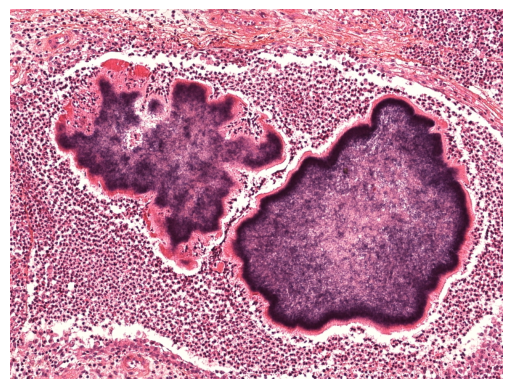

In [20]:
plt.imshow(img)
plt.axis('off')
plt.show()

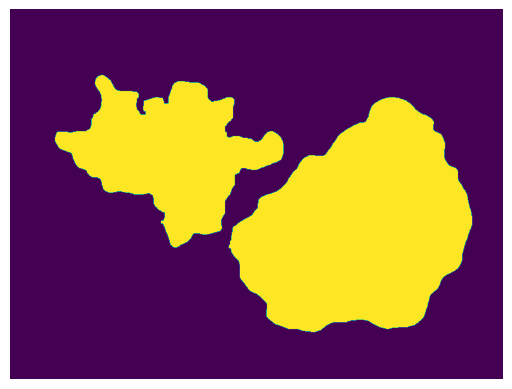

In [21]:
plt.imshow(mask)
plt.axis('off')
plt.show()

In [22]:
# save mask as jpg
mask = mask * 255

# Convert the numpy array to a PIL Image and save as JPG
mask_image = Image.fromarray(mask)
mask_image.save(f'example_postproc.jpg', format='JPEG')

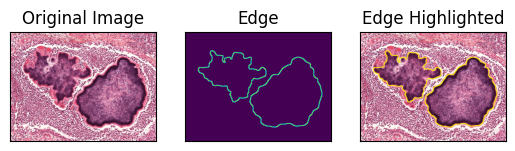

In [23]:
edges = cv2.Canny(mask,0,1)   # canny edge detector

edges = cv2.dilate(edges, np.ones((4, 4)))

edge_highlighted = img.copy()
edge_highlighted[edges == 255] = [255, 255, 0]  # turn edges to yellow

plt.subplot(131),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges)
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge_highlighted)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])

plt.show()

In [24]:
# save overlaid edge image
edge_highlighted_image = Image.fromarray(edge_highlighted)
edge_highlighted_image.save(f'example_with_edge.jpg', format='JPEG')

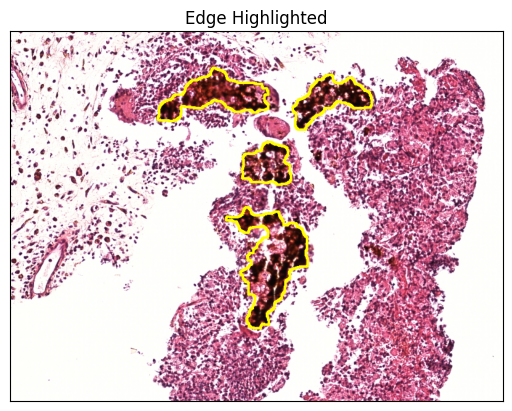

In [39]:
plt.imshow(edge_highlighted)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
# Get predictions
class_preds = pd.read_excel(os.path.join(DATA_DIR, 'classification_labels_sub2.xlsx'), engine='openpyxl')

In [41]:
class_preds.head()

,Filename,Prediction
0,100P.jpg,FM
1,10A.jpg,BM
2,10I.jpg,FM
3,11O.jpg,FM
4,11Y.jpg,FM


In [ ]:
# for each test image, get edge of mask, overlay, and save this as a jpg

# Create a new folder within the data directory to save the output images
output_dir = os.path.join(DATA_DIR, 'overlaid_mask_edges')
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

for path in test_paths:
    # Load image and mask
    img = return_image(DATA_DIR, path)

    rel_path = path.split('/', 1)[1] # remove first directory
    postproc_mask_path = os.path.join('best_model_test_postproc_tiff', rel_path)

    mask = return_mask(DATA_DIR, postproc_mask_path)

    edges = cv2.Canny(mask,0,1)   # canny edge detector

    edges = cv2.dilate(edges, np.ones((4, 4)))

    edge_highlighted = img.copy()
    edge_highlighted[edges == 255] = [255, 255, 0]  # turn edges to yellow

    # Get prediction from dataframe
    filename = os.path.basename(path) + ".jpg"
    prediction = class_preds.loc[class_preds['Filename'] == filename, 'Prediction'].values[0]

    # Construct output image path
    output_image_path = os.path.join(output_dir, os.path.basename(path) + '.jpg')

    plt.imshow(edge_highlighted)
    plt.title(f"Class Prediction: {prediction}", fontsize = 16)
    plt.xticks([]), plt.yticks([])

    # Save the plot with no tight borders
    #plt.savefig(output_image_path, bbox_inches='tight')
    plt.show()

    # Save the image as a JPG file
    #cv2.imwrite(output_image_path, cv2.cvtColor(edge_highlighted, cv2.COLOR_RGB2BGR))

    #print(f"Saved overlaid image with edges to {output_image_path}")